## Predicting Housing Price in Melbourne 

Importing necessary libraries



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

Importing dataset for futher analysis in traditional way

In [3]:
df = pd.read_csv("melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


We have noticed that the data is huge and there are many NaN values in dataset. We need to remove them because they can affect the accuracy and reliability of statistical analysis and machine learning models.

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

One way to automate the data importing and cleaning process is by writing a function. This will make sure that all our data undergoes the same process, and that our analysis is easily reproducible — something that's very important in science in general and data science in particular.

In [103]:
# defining function for not writing same code again and again
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Subsetting to properties in '"Northern Metropolitan"'
    
    mask_ba = df["Regionname"].str.contains("Northern Metropolitan")
    
    #subset to house 
    
    mask_apt=df["Type"]=="h"
    
    # subset to properties where "price_apro_usd" , 400,000
    mask_price = df["Price"] < 800_000
    
    
    #remove outliers
    
    low,high = df["BuildingArea"].quantile([0.1,0.9])
    mask_area = df["BuildingArea"].between(low,high)
    df = df[mask_area & mask_ba & mask_apt & mask_price]
    
    # Removing null values
    df.dropna(inplace=True)

    return df 

In [104]:
df = wrangle("melbourne_housing_FULL.csv")
print("df shape:", df.shape)
df.head()

df shape: (752, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2151,Brunswick,2/3 Donald St,3,h,680000.0,PI,Nelson,4/06/2016,5.2,3056.0,...,3.0,1.0,81.0,100.0,2016.0,Moreland City Council,-37.7575,144.9647,Northern Metropolitan,11918.0
2213,Brunswick,157 Albion St,2,h,770000.0,S,Nelson,15/10/2016,5.2,3056.0,...,1.0,0.0,152.0,87.0,1910.0,Moreland City Council,-37.7611,144.9660,Northern Metropolitan,11918.0
2313,Brunswick,30 Lobb St,3,h,740000.0,PI,Nelson,28/05/2016,5.2,3056.0,...,2.0,1.0,4676.0,122.0,2010.0,Moreland City Council,-37.7687,144.9649,Northern Metropolitan,11918.0
2318,Brunswick,46 Tinning St,2,h,765000.0,S,Nelson,28/05/2016,5.2,3056.0,...,1.0,1.0,199.0,120.0,1880.0,Moreland City Council,-37.7590,144.9597,Northern Metropolitan,11918.0
2322,Brunswick,10 Cliff St,1,h,772000.0,SP,Collins,28/08/2016,5.2,3056.0,...,1.0,1.0,147.0,82.0,1890.0,Moreland City Council,-37.7643,144.9584,Northern Metropolitan,11918.0


In [46]:
df["Type"].value_counts()

h    1740
Name: Type, dtype: int64

Create a histogram of "BuildingArea".

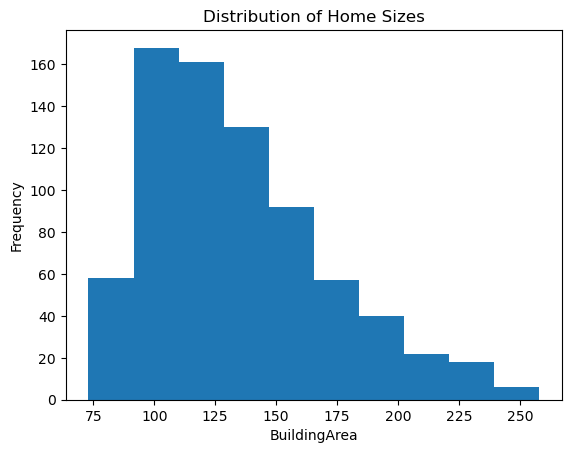

In [105]:
plt.hist(df["BuildingArea"])
plt.xlabel("BuildingArea")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

While making histogram I have noticed that there are outliers in the dataset and need to remove. It might possible too that the area can be 3112.0 because their might be someone who is super rich but for now we need to remove it. despite removing outliers we need to consider that value too while communicating the results.

Lets calculate the summary statistics for df using the describe method.

In [11]:
df["BuildingArea"].describe()

count    5749.000000
mean      136.019675
std        30.543272
min        88.000000
25%       110.000000
50%       132.000000
75%       159.000000
max       202.000000
Name: BuildingArea, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our wrangle function and remove them from the dataset.

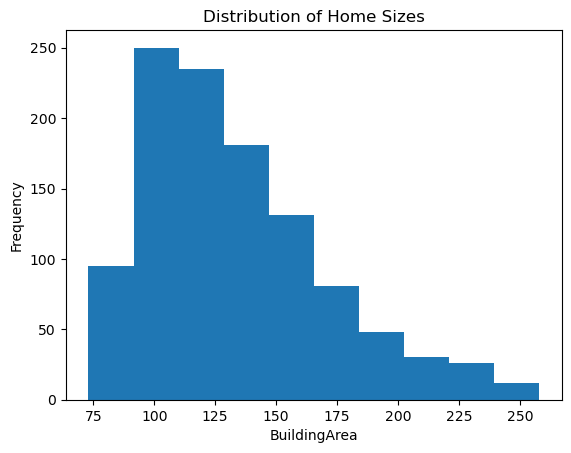

In [82]:
plt.hist(df["BuildingArea"])
plt.xlabel("BuildingArea")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

Lets explore distribution of home sizes through boxplot. It is an effective way to look through. 

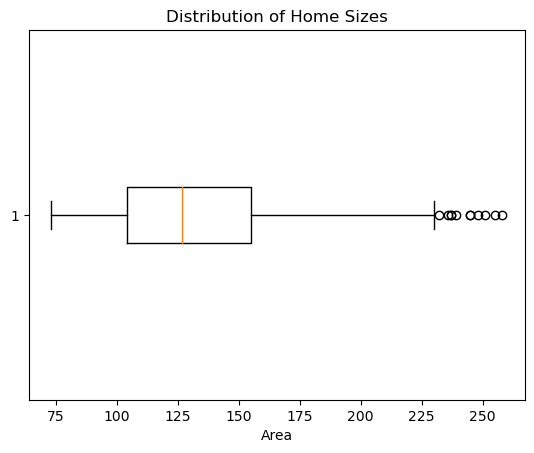

In [106]:
plt.boxplot(df["BuildingArea"],vert = False)
plt.xlabel("Area")
plt.title("Distribution of Home Sizes");

lets create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset.

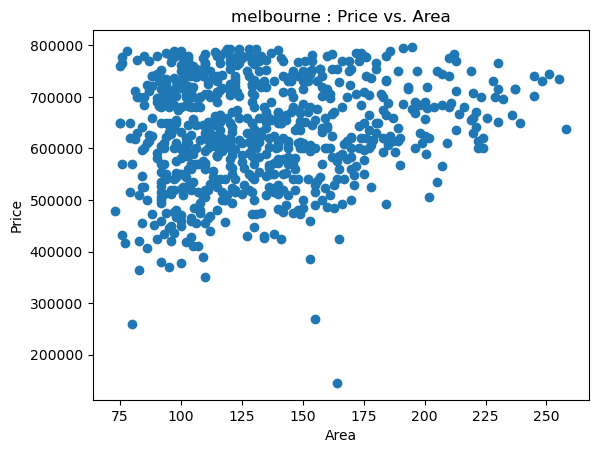

In [107]:
plt.scatter(x = df["BuildingArea"], y = df["Price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("melbourne : Price vs. Area");


# split


A key part in any model-building project is separating your target (the thing you want to predict) from your features (the information your model will use to make its predictions). Since this is our first model, we'll use just one feature:Building Size.

Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["BuildingArea"]. Remember that your feature matrix should always be two-dimensional.

In [108]:
features = ["BuildingArea"]
X_train = df[features]
X_train.shape

(752, 1)

Create the target vector named y_train, which you'll use to train your model. Your target should be "Price". Remember that, in most cases, your target vector should be one-dimensional.

In [109]:
target = "Price"
y_train = df[target]
y_train.shape

(752,)

# Build Model

### Baseline

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

Calculate the mean of your target vector y_train and assign it to the variable y_mean.

In [110]:
y_mean = y_train.mean()
y_mean

633092.5571808511

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset.

Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [111]:
y_pred_baseline = [ y_mean] * len(y_train) 
len(y_pred_baseline) ==   len(y_train)

True

So how does our baseline model perform? One way to evaluate it is by plotting it on top of the scatter plot we made above. 

Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

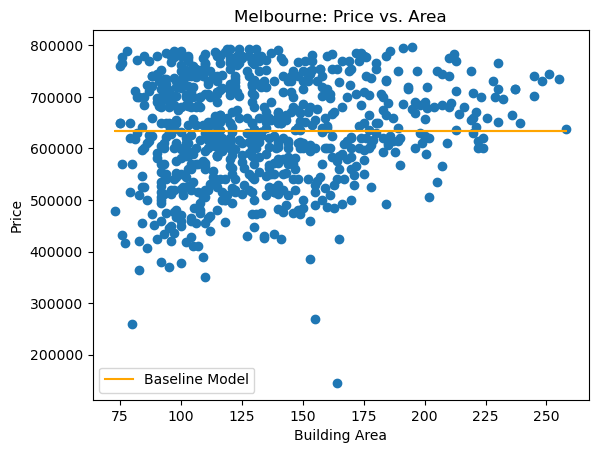

In [112]:
plt.plot(X_train.values, y_pred_baseline, color = "orange", label = "Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Building Area")
plt.ylabel("Price")
plt.title("Melbourne: Price vs. Area")
plt.legend();

Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate performance metric. There are lots of performance metrics, but the one we'll use here is the mean absolute error.

Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted


In [114]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 633092.56
Baseline MAE: 83083.72


What does this information tell us? If we always predicted that an apartment price is $966853.54, our predictions would be off by an average of $319361.97. It also tells us that our model needs to have mean absolute error below $319361.97 in order to be useful.

# Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started!

 Instantiate a LinearRegression model named model

In [115]:
model = LinearRegression()

The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data. 

Fit your model to the data, X_train and y_train.

In [116]:
model.fit(X_train,y_train)

LinearRegression()

# Evaluate

The final step is to evaluate our model. In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training. So let's have it predict the price for the houses in our training set.

Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [117]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([618760.70151707, 613224.54491076, 628129.58192776, 627277.86552679,
       611095.25390833])

Now that we have predictions, we'll use them to assess our model's performance with the training data. We'll use the same metric we used to evaluate our baseline model: mean absolute error.

Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

In [118]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 82100.41


Good news: Our model beat the baseline but by approximately just two thousand.

Run the code below to import your test data "melbourne_housing_FULL.csv" into a DataFrame and generate a Series of predictions using your model. 

In [119]:
X_test = df[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    618760.701517
1    613224.544911
2    628129.581928
3    627277.865527
4    611095.253908
dtype: float64

# Communicate Results

Once your model is built and tested, it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation. When we created our baseline model, we represented it as a line.

Let's start with the intercept.

Extract the intercept from your model, and assign it to the variable intercept.

In [120]:
intercept = (model.intercept_).round(2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 576174.88


Extract the coefficient associated "Building Area" in your model, and assign it to the variable coefficient.

In [121]:
coefficient = (model.coef_[0]).round(2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 425.86


Now that we have our intercept and coefficient, we need to insert them into a string that we can print out the complete equation.

In [122]:
print(f"apt_price = {intercept} + {coefficient} * surface_covered")

apt_price = 576174.88 + 425.86 * surface_covered


Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training. Be sure that the line color is red, and that it has the label "Linear Model".

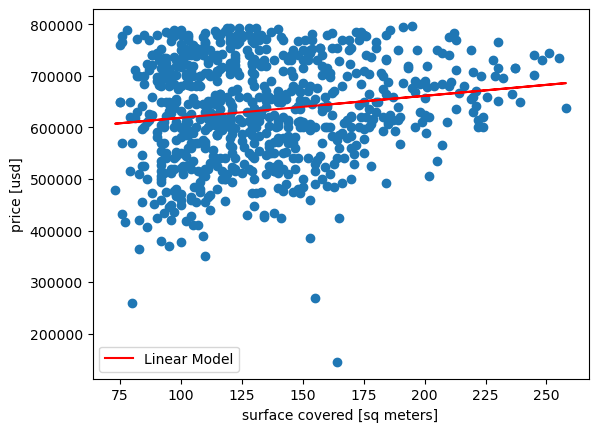

In [123]:
plt.plot(X_train.values, y_pred_training, color = "red", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();
